In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### •	output : 0= less chance of heart attack, 1= more chance of heart attack

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Ảnh hưởng của các thuộc tính lên khả năng bị nhồi máu cơ tim

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

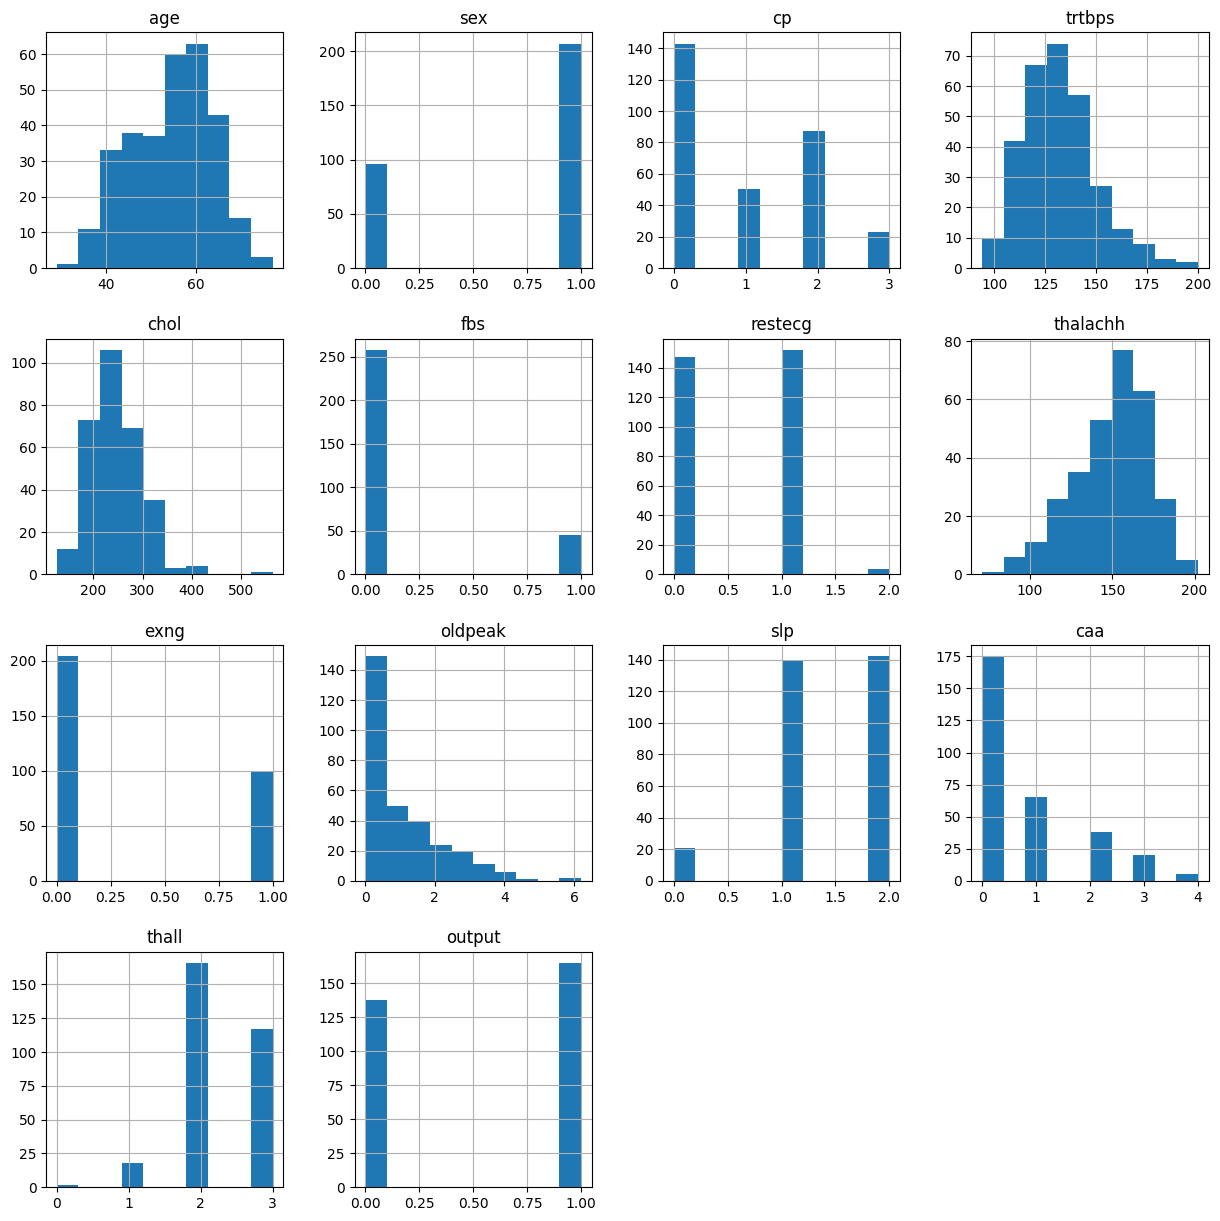

In [5]:
data.hist(figsize=(15,15))

In [6]:
data['age_cat'] = pd.cut(data['age'],bins= [25,40,55,70,85], labels= ['1','2','3','4'])
# Tuổi loại 1: [25,40]
# Tuổi loại 2: [40,55]
# Tuổi loại 3: [55,70]
# Tuổi loại 4: [70,85]

<Axes: xlabel='age_cat', ylabel='count'>

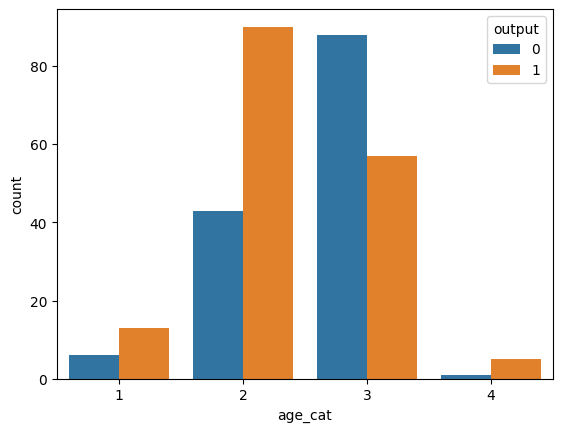

In [7]:
sns.countplot(data= data, x = data['age_cat'], hue = 'output')

<Axes: xlabel='sex', ylabel='count'>

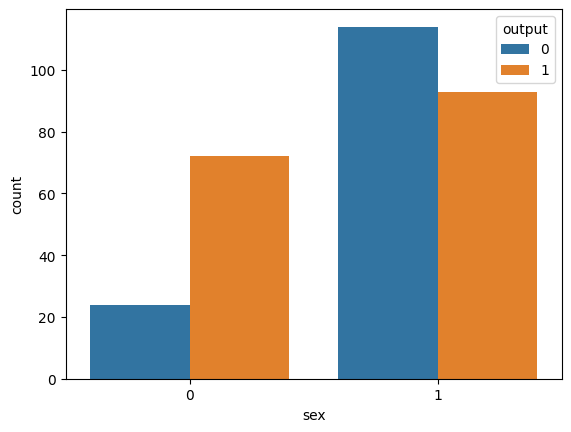

In [8]:
sns.countplot(data= data, x = data['sex'], hue = 'output')

<Axes: xlabel='exng', ylabel='count'>

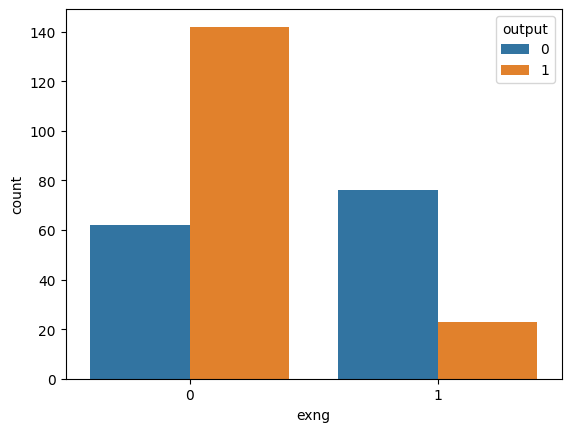

In [9]:
sns.countplot(data= data, x = data['exng'], hue = 'output')
# exang: exercise induced angina (1 = Yes; 0 = no) (đau tim do lao động gắng sức)

<Axes: xlabel='cp', ylabel='count'>

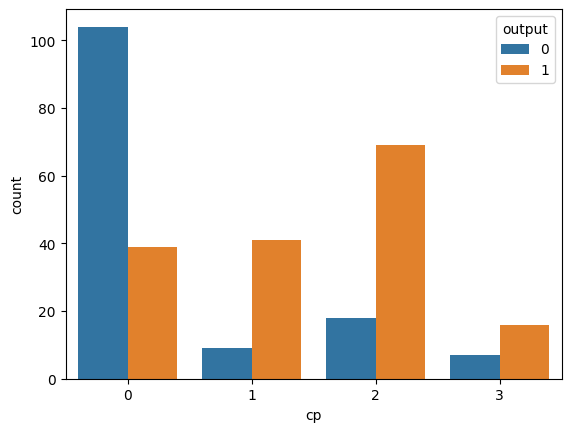

In [10]:
sns.countplot(data= data, x = data['cp'], hue = 'output')
## cp: các loại đau ngực

In [41]:
data['trtbps_cat'] = pd.cut(data['trtbps'],bins = [90,129,210], labels=['low','high'])
# blood pressure: huyết áp


<Axes: xlabel='trtbps_cat', ylabel='count'>

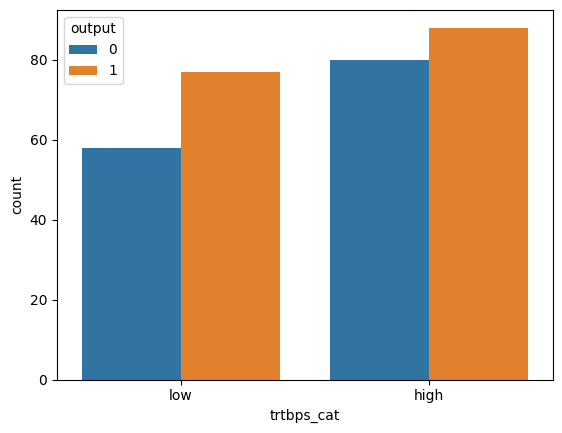

In [12]:
sns.countplot(data= data, x = data['trtbps_cat'], hue = 'output')
# thuoc tinh ko co gia tri trong model

In [13]:
data['chol_cat'] = pd.cut(data['chol'], bins = [100,200,300,400,500,600], labels= [1,2,3,4,5])

<Axes: xlabel='chol_cat', ylabel='count'>

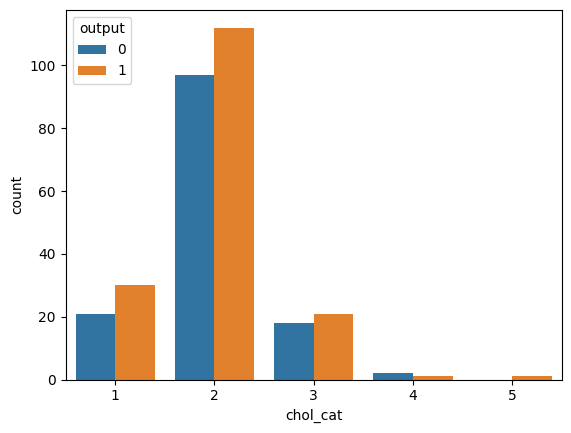

In [14]:
sns.countplot(data= data, x = data['chol_cat'], hue = 'output')

<Axes: xlabel='fbs', ylabel='count'>

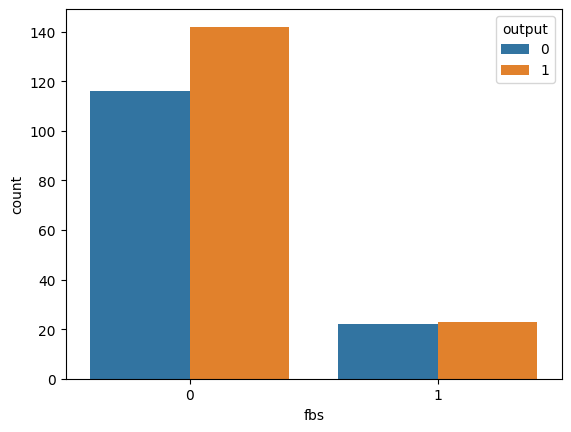

In [15]:
sns.countplot(data= data, x = data['fbs'], hue = 'output')
# fbs: fasting blood sugar (chỉ số đường huyết)

<Axes: xlabel='restecg', ylabel='count'>

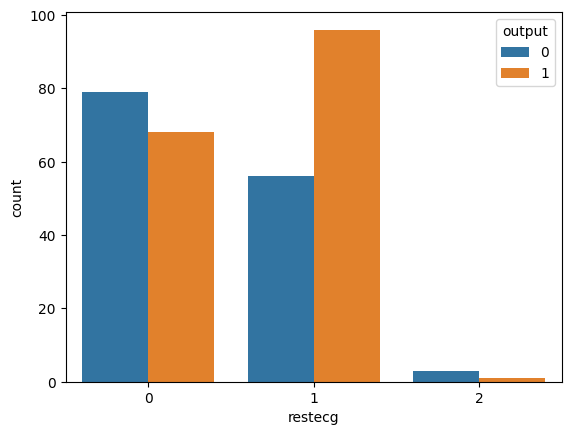

In [16]:
sns.countplot(data= data, x = data['restecg'], hue = 'output')
# restecg: kết quả điện tâm đồ lúc nghỉ

In [17]:
data['thalachh_cat'] = pd.cut(data['thalachh'],bins = [60,129,210], labels = ['1','2'])
# thalachh: nhịp tim tối đa đạt đc
# 1: thấp
# 2: cao

<Axes: xlabel='thalachh_cat', ylabel='count'>

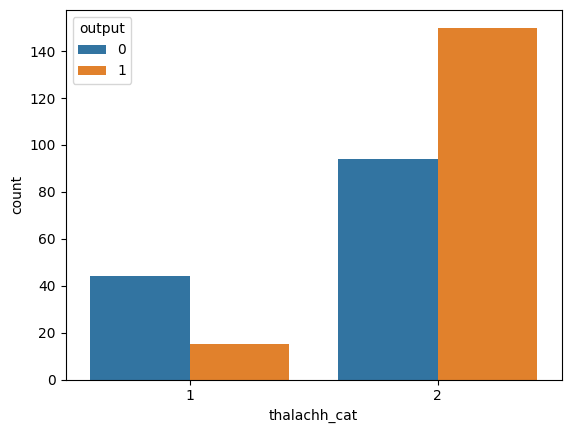

In [18]:
sns.countplot(data= data, x = data['thalachh_cat'], hue = data['output'])

In [19]:
cols = ['age_cat', 'sex', 'cp', 'chol_cat', 'fbs', 'restecg', 'thalachh_cat',
       'exng']

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix


In [21]:
X = data[cols].values
y = data['output']
X[0:5]
#chuyen thanh ma tran 2 chieu 

array([['3', 1, 3, 2, 1, 0, '2', 0],
       ['1', 1, 2, 2, 0, 1, '2', 0],
       ['2', 0, 1, 2, 0, 0, '2', 0],
       ['3', 1, 1, 2, 0, 1, '2', 0],
       ['3', 0, 0, 3, 0, 1, '2', 1]], dtype=object)

In [22]:
X = StandardScaler().fit_transform(X)
# chuan hoa dl ham fit tranform

In [23]:
X[0:5]

array([[ 0.84732453,  0.68100522,  1.97312292,  0.0163605 ,  2.394438  ,
        -1.00583187,  0.49173497, -0.69663055],
       [-2.26466738,  0.68100522,  1.00257707,  0.0163605 , -0.41763453,
         0.89896224,  0.49173497, -0.69663055],
       [-0.70867143, -1.46841752,  0.03203122,  0.0163605 , -0.41763453,
        -1.00583187,  0.49173497, -0.69663055],
       [ 0.84732453,  0.68100522,  0.03203122,  0.0163605 , -0.41763453,
         0.89896224,  0.49173497, -0.69663055],
       [ 0.84732453, -1.46841752, -0.93851463,  1.66877098, -0.41763453,
         0.89896224,  0.49173497,  1.43548113]])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#tach ra tap train test

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 8)
(242,)
(61, 8)
(61,)


In [26]:
DT = DecisionTreeClassifier(criterion= 'entropy',max_depth= 7, random_state= 10)

In [29]:
DT.fit(X_train,y_train)
#fit huan luyen model

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=10)

In [42]:
y_pred = DT.predict(X_test)
f1_score(y_pred,y_test,average='macro')
#

0.8124126362873918

In [31]:
svm = SVC(kernel= 'poly')
#phan lop sd duong phan lop

In [32]:
svm.fit(X_train,y_train)

SVC(kernel='poly')

In [33]:
y_pred_2 = svm.predict(X_test)
f1_score(y_pred_2,y_test,average='macro')

0.755720823798627

In [34]:
naive = GaussianNB()

In [35]:
naive.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred_3 = naive.predict(X_test)

In [37]:
f1_score(y_test,y_pred_3,average='macro')

0.7809997238331954